In [1]:
# imports
from matplotlib import pyplot as plt
import compression_handler
import eval_handler
from dataset_handler.kodak import Kodak
from tqdm import tqdm

compression_algorithms = compression_handler.get_all()
eval_algorithms = eval_handler.get_all()
dataset = Kodak()
SAMPLES = 5

In [2]:
# generate data
data = []
samples = dataset.get_samples(SAMPLES).itertuples()
for r_indx, row in tqdm(enumerate(samples), total=SAMPLES):
    data.append([])
    raw_image = dataset.get_PIL_image(row)
    for compression_algorithm in compression_algorithms:
        data[r_indx].append(compression_algorithm.parameter_range_handler(raw_image, eval_algorithms))
        


100%|██████████| 5/5 [03:16<00:00, 39.23s/it]


In [3]:
# parse/average data
parsed = {}
for e_indx, eval_algorithm in enumerate(eval_algorithms):
    eval_data = {}
    for c_indx, compression_algorithm in enumerate(compression_algorithms):
        stream = []
        parameters = data[0][ c_indx].keys()
        for param in parameters:
            avrg_size = 0
            avrg_score = 0
            for sample in range(SAMPLES):
                avrg_size += data[sample][ c_indx][param][0]
                avrg_score += data[sample][ c_indx][param][1][e_indx]
            avrg_size /= SAMPLES
            avrg_score /= SAMPLES
            stream.append((avrg_size, avrg_score))
        stream = sorted(stream, key=lambda x: x[0])
        eval_data[compression_algorithm.__class__.__name__] = stream
    parsed[eval_algorithm.__class__.__name__] = eval_data
            

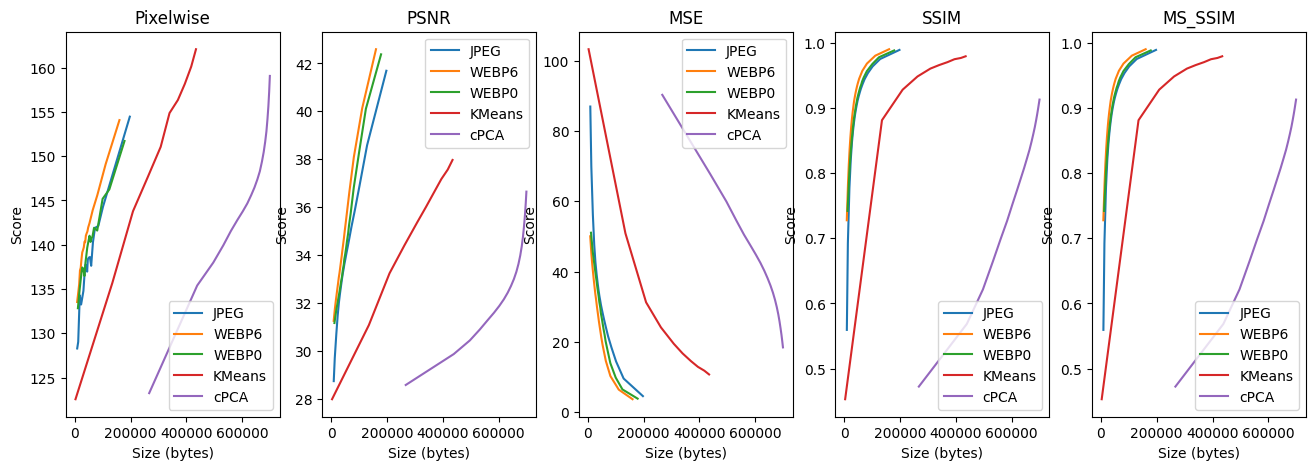

In [4]:
plot, ax = plt.subplots(1, len(eval_algorithms), figsize=(16, 5))
if ax.size == 1:
    ax = [ax]


# plot the data
for e_indx, eval_algorithm in enumerate(eval_algorithms):
    for c_indx, compression_algorithm in enumerate(compression_algorithms):
        ax[e_indx].plot([x[0] for x in parsed[eval_algorithm.__class__.__name__][compression_algorithm.__class__.__name__]], [x[1] for x in parsed[eval_algorithm.__class__.__name__][compression_algorithm.__class__.__name__]], label=compression_algorithm.__class__.__name__)
    ax[e_indx].set_title(eval_algorithm.__class__.__name__)
    ax[e_indx].set_xlabel('Size (bytes)')
    ax[e_indx].set_ylabel('Score')
    ax[e_indx].legend()
        
plt.savefig('compression_evaluation.png')